<a href="https://colab.research.google.com/github/hayaa-1/Supervised-Machine-Learning/blob/main/weather_forcasting_rain_tomorrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = darkred> Machine Learning I (Final Project) (Due June 12, 2022)</font>
## Task #1:
### Objective:
• The objective of this project is to analyze the weather data and extract the hypotheses to arrive at a prediction<br>
• You need to perform at least one classification task of your choice and one regression task in your project.<br> 
<b>Dataset:</b> weather prediction dataset(weatherHistory.csv)<br> 
• Available at: https://github.com/martandsingh/datasets/blob/master/weatherHistory.csv<br>
• https://www.kaggle.com/datasets/zaraavagyan/weathercsv<br>
The dataset consists of different attributes describing the weather condition such as temperature, humidity, pressure…etc.<br>
You are requested to do the following for both the regression and classification problems:

<b>Task 1-a: Classification<font color =darkgreen>Target: Precip Type (snow/rain) , score: F1_score </font> </b><br> 
1- Load the data and perform all necessary data cleaning and scaling.<br>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv('weather1.csv')
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [ ]:
data = data.dropna()

__________________________
2- Data inspection. Use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data<br>


In [ ]:
from sklearn.model_selection import train_test_split
# Spliting the data to train and test data sets
traindf , testdf = train_test_split(data, test_size = 0.2, random_state=2022)
                                     # in other Scenario we can split it with date(using old data to predict new data)

In [ ]:
X_train = traindf.drop('RainTomorrow', axis =1)
y_train = (traindf['RainTomorrow']=='Yes').astype(int)
X_test = testdf.drop('RainTomorrow', axis =1)
y_test = (testdf['RainTomorrow']=='Yes').astype(int)

In [ ]:
#Repeated cols
def find_repeated_cols(data , max_repetition):
    #find the maximum allowed number of rows allowed to have the same value 
    max_allowed = max_repetition * data.shape[0]
    
    cols = list(data.columns)
    repeated = []
    
    for i in cols:
        if data[i].value_counts().iloc[0] > max_allowed:
            repeated.append(i)
            
    return repeated
to_drop = find_repeated_cols(X_train,0.9)
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)
print(to_drop)

[]


In [ ]:
cols = X_train.columns
num_cols = list(X_train.describe().columns)
cat_cols = list(set(cols)-set(num_cols))
print(num_cols)
print(cat_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
['WindDir3pm', 'WindGustDir', 'RainToday', 'WindDir9am']


In [ ]:
def find_corr_cols(X,y, num_cols ,corr_th):
    corr_matrix = X[num_cols].corr()
    corr_cols = []
    for i in range(len(num_cols)):
        for j in range(i+1,len(num_cols)):
                if np.abs(corr_matrix.iloc[i,j]) > corr_th:

                    corr_i = np.abs(np.corrcoef(X[num_cols[i]],y)[0,1])
                    corr_j = np.abs(np.corrcoef(X[num_cols[j]],y)[0,1])
                    
                    if corr_i >= corr_j:
                        corr_cols.append(num_cols[j])
                    else:
                        corr_cols.append(num_cols[i])
    return list(set(corr_cols))

to_drop=find_corr_cols(X_train,y_train, num_cols ,0.7)
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)
print(to_drop)

['Humidity3pm', 'Temp9am', 'MaxTemp', 'Pressure9am', 'Temp3pm']


In [ ]:
cols = X_train.columns
num_cols = list(X_train.describe().columns)
cat_cols = list(set(cols)-set(num_cols))
print(num_cols)
print(cat_cols)

['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RISK_MM']
['WindDir3pm', 'WindGustDir', 'RainToday', 'WindDir9am']


In [ ]:
def outliers_ths(X, th):
    desc = X.describe()
    Q1 = desc.loc['25%',:]
    Q3 = desc.loc['75%',:]
    IQR = Q3 - Q1
    Upper = Q3 + th*IQR.values
    Lower = Q1 - th*IQR.values
    return Upper, Lower
Upper , Lower = outliers_ths(traindf[num_cols], 5)

for i in range(len(num_cols)):
            col = num_cols[i]
            X_train.loc[X_train[col]<Lower[i], col] = Lower[i]
            X_train.loc[X_train[col]>Upper[i], col] = Upper[i]
            
            X_test.loc[X_test[col]<Lower[i], col] = Lower[i]
            X_test.loc[X_test[col]>Upper[i], col] = Upper[i]

In [ ]:
def skewed_cols(X, num_cols):
    skewed = []
    for i in num_cols:
            var_avg = X[i].mean()
            var_std = X[i].std()
            sk = (((X[i]-var_avg)/var_std)**3).sum() / X.shape[0]
            if  np.abs(sk) > 1 :
                skewed.append(i)
    return skewed

log_trans = skewed_cols(X_train[num_cols],num_cols)
for i in log_trans:
    X_train[i] = np.log(1+np.abs(X_train[i]))
    X_test[i] = np.log(1+np.abs(X_test[i]))
print(log_trans)

['Rainfall', 'WindSpeed9am', 'RISK_MM']


In [ ]:
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def sh_test(X, num_cols, shapiro_alpha):
    gaussian = []
    non_gaussian = []

    for i in num_cols:
        if shapiro(np.array(X[i].sample(100,random_state =0)))[1] > shapiro_alpha:
            gaussian.append(i)
        else: 
            non_gaussian.append(i)
    return gaussian, non_gaussian
gaussian, non_gaussian = sh_test(X_train, num_cols, 0.05)

if len(gaussian) >0:    
    StandardScaler1 = StandardScaler()
    X_train[gaussian] = StandardScaler1.fit_transform(X_train[gaussian])
    X_test[gaussian] = StandardScaler1.transform(X_test[gaussian]) 
if len(non_gaussian) >0:
    MinMaxScaler1 = MinMaxScaler()
    X_train[non_gaussian] = MinMaxScaler1.fit_transform(X_train[non_gaussian])
    X_test[non_gaussian] = MinMaxScaler1.transform(X_test[non_gaussian]) 
print('Standard Scaler: ' ,gaussian)
print('Min Max Scaler: ', non_gaussian)

Standard Scaler:  ['WindGustSpeed', 'Pressure3pm']
Min Max Scaler:  ['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Cloud9am', 'Cloud3pm', 'RISK_MM']


In [ ]:
#encoding the categorical variables # one hot encoding , binary encoding (only for rain today)
X_train['RainToday'] =(X_train['RainToday']=='Yes').astype(int)
X_test['RainToday'] =(X_test['RainToday']=='Yes').astype(int)

In [ ]:
OHE = list(set(cat_cols)-set(['RainToday']))
for i in range(len(OHE)):
    nominal_vals= X_train[OHE[i]].unique()
    for j in nominal_vals:
        col ='{}_{}'.format(OHE[i],j)   
        X_train.loc[X_train[OHE[i]]==j,col] =1
        X_train[col] = X_train[col].fillna(0).astype(int)
        
        X_test.loc[X_test[OHE[i]]==j,col] =1
        X_test[col] = X_test[col].fillna(0).astype(int)
        
    X_train = X_train.drop(OHE[i] , axis=1)
    X_test = X_test.drop(OHE[i] , axis=1)

In [ ]:
# data imbalance 
print('mindatory class size is {:.3} from the data set '.format (y_train.mean()))

mindatory class size is 0.183 from the data set 


In [ ]:
#under-sampling traindata set
under_sampling_size = y_train.sum()

X_train_undersampled = X_train[y_train==0].sample(under_sampling_size , replace=False, random_state=1)
X_train_undersampled = pd.concat([X_train_undersampled, X_train[y_train==1]], axis=0)

y_train_undersampled = np.zeros((X_train_undersampled.shape[0]))
y_train_undersampled[under_sampling_size:] = 1

In [ ]:
X_train.shape

(262, 61)

__________________________
3- Explore the selection of various feature variables for classification. You should include at least one categorical feature.<br>

<AxesSubplot:>

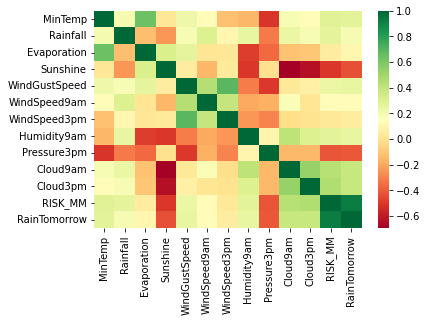

In [ ]:
traindf1= X_train[num_cols].copy()
traindf1['RainTomorrow']= y_train
import seaborn as sns
sns.heatmap(traindf1.corr(),cmap = 'RdYlGn')

## <font color = darkgreen>it seems that RISK_MM has the highest effect in target variable<br> most of features has no significant effect </font> 

_________________
4- Classify the data using various classification methods explored in ML1 (logistic regression, SVC, Decision trees, SVC, KNN classifier). Explore using different model parameters in the built-in sklearn libraries.<br>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Area Under ROC curve : 0.9991319444444444


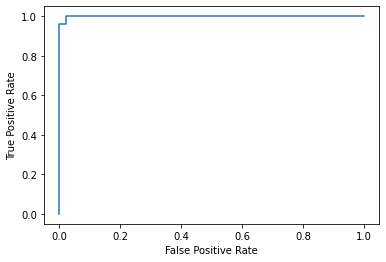

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train_undersampled, y_train_undersampled)

y_proba = LogReg.predict_proba(X_train_undersampled)[:,1]
fpr , tpr , ths= roc_curve(y_train_undersampled, y_proba)

print('Area Under ROC curve :' , roc_auc_score(y_train_undersampled, y_proba))
plt.plot(fpr,tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');


In [ ]:
th = ths[np.where(tpr>0.55)[0][0]]
print('threshold : ' , th)

y_hat_train = ((LogReg.predict_proba(X_train_undersampled)>th)[:,1]).astype(int)

train_f1= f1_score(y_train_undersampled, y_hat_train)

y_hat_test = ((LogReg.predict_proba(X_test)>th)[:,1]).astype(int)
test_f1= f1_score(y_test , y_hat_test)
print(' train f1 : {} \n test f1 {}'.format(train_f1, test_f1))

threshold :  0.8212177893487075
 train f1 : 0.967741935483871 
 test f1 0.8571428571428571


In [ ]:
Cs = np.linspace(1,30,30)

kernals = ['linear', 'poly','rbf']
print('kernal : {}'.format(kernals[0]))
#print ('              C      train_f1      test_f1')

max_f1 = 0
choosed_c = 0

for c in Cs:
    model = SVC(C =c , kernel=kernals [0])
    model.fit(X_train_undersampled , y_train_undersampled)
    y_hat = model.predict(X_train_undersampled)
    train_f1= f1_score(y_train_undersampled , y_hat)

    y_hat_test = model.predict(X_test)
    test_f1= f1_score(y_test , y_hat_test)
    
    if test_f1 > max_f1:
        max_f1 = test_f1 
        choosed_c = c

 #   print('              ',"{:.3}".format(c),'        ',"{:.3}".format(train_f1),
  #        '      ','     ',"{:.3}".format(test_f1)  )
print('Choosed parameter :\n C = ',choosed_c , '    \n max_test_f1: ',max_f1)


kernal : linear
Choosed parameter :
 C =  3.0     
 max_test_f1:  1.0


In [ ]:
print('kernal : {}'.format(kernals[1]))
#print ('              C    d    gamma      train_f1   test_f1')
Degree = [2,3,4,5,6,7]
g  = .0001
max_f1 = 0
choosed_parameters_poly ={'c':0,'degree':0,'gamma':0}
for i in range(5):
    for d in Degree: 
        for c in Cs:
            model = SVC(C =c , kernel=kernals[1], degree=d , gamma =g )
            model.fit(X_train_undersampled , y_train_undersampled)
            y_hat = model.predict(X_train_undersampled)
            train_f1= f1_score(y_train_undersampled , y_hat)

            y_hat_test = model.predict(X_test)
            test_f1= f1_score(y_test , y_hat_test)

            if test_f1 >max_f1:
                max_f1 = test_f1
                choosed_parameters_poly['c']=c
                choosed_parameters_poly['degree']=d
                choosed_parameters_poly['gamma']=g

 #           print('            ',"{:.3}".format(c),'  ',d,' ',"{:.4}".format(g),'          ',"{:.3}".format(train_f1),
  #                '     ',"{:.3}".format(test_f1)  )
    g = g+0.0005

print('Choosed parameters :\n ', choosed_parameters_poly,'    \n max_test_f1: ',max_f1)



kernal : poly
Choosed parameters :
  {'c': 1.0, 'degree': 7, 'gamma': 0.0001}     
 max_test_f1:  0.3793103448275862


In [ ]:
print('kernal : {}'.format(kernals[2]))
#print ('              C    gamma      train_f1     test_f1')

g  = .0001
max_f1 = 0
gammas = []
F1_score=[]
choosed_parameters_rbf ={'c':0,'gamma':0}
for i in range(20): 
    gammas.append(g)
    f1 = []
    for c in Cs:
        model = SVC(C =c , kernel=kernals[2] , gamma =g )
        model.fit(X_train_undersampled , y_train_undersampled)
        y_hat = model.predict(X_train_undersampled)
        train_f1= f1_score(y_train_undersampled , y_hat)
 
        y_hat_test = model.predict(X_test)
        test_f1= f1_score(y_test , y_hat_test)
        f1.append([train_f1 , test_f1])
        if test_f1 >max_f1:
            max_f1 = test_f1
            choosed_parameters_rbf['c']=c
            choosed_parameters_rbf['gamma']=g
    F1_score.append(f1)
 #       print('            ',"{:.3}".format(c),'  ',"{:.4}".format(g),'         ',"{:.3}".format(train_f1),
  #            '     ',"{:.3}".format(test_f1)  )
    g = g+0.04

print('Choosed parameters :\n ', choosed_parameters_rbf,'    \n max_test_f1: ',max_f1 )

kernal : rbf
Choosed parameters :
  {'c': 2.0, 'gamma': 0.040100000000000004}     
 max_test_f1:  0.8571428571428571


In [ ]:
# Decision Tree 

max_f1 = 0
choosedDT = {}
for i in range(3,100):
    DT = DecisionTreeClassifier(max_depth= i , random_state = 2022)
    DT.fit(X_train , y_train)
    test_score = f1_score(y_test, DT.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedDT['max_depth'] = i

max_f1 = 0
for i in range(2,100):
    DT = DecisionTreeClassifier(max_depth= choosedDT['max_depth'],min_samples_split=i , random_state = 2022)
    DT.fit(X_train , y_train)
    test_score = f1_score(y_test, DT.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedDT['min_samples_split'] = i

max_f1 = 0
for i in range(1,100):
    DT = DecisionTreeClassifier(max_depth= choosedDT['max_depth'],min_samples_split=choosedDT['min_samples_split'] ,
                                min_samples_leaf=i , random_state = 2022)
    DT.fit(X_train , y_train)
    test_score = f1_score(y_test, DT.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedDT['min_samples_leaf'] = i

max_f1=0
for i in range(1,X_train.shape[1]+1):
    DT = DecisionTreeClassifier(max_depth= choosedDT['max_depth'],min_samples_split=choosedDT['min_samples_split'] ,
                                min_samples_leaf=choosedDT['min_samples_leaf'], max_features= i, random_state = 2022)
    DT.fit(X_train , y_train)
    test_score = f1_score(y_test, DT.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedDT['max_features'] = i

max_f1 = 0
for i in range(2,1000):
    DT = DecisionTreeClassifier(max_depth= choosedDT['max_depth'],min_samples_split=choosedDT['min_samples_split'] ,
                                min_samples_leaf=choosedDT['min_samples_leaf'], max_features= choosedDT['max_features'],
                                max_leaf_nodes= i*10 , random_state = 2022)
    DT.fit(X_train , y_train)
    test_score = f1_score(y_test, DT.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedDT['max_leaf_nodes'] = i*10

max_f1 = 0
for i in range(1,100):
    DT = DecisionTreeClassifier(max_depth= choosedDT['max_depth'],min_samples_split=choosedDT['min_samples_split'] ,
                                min_samples_leaf=choosedDT['min_samples_leaf'], max_features= choosedDT['max_features'],
                                ccp_alpha=0.001 *i , random_state = 2022)
    DT.fit(X_train , y_train)
    test_score = f1_score(y_test, DT.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedDT['ccp_alpha'] = 0.001*i
        
print('Choosed parameters for Decision Tree model : ')
print(choosedDT)
DT = DecisionTreeClassifier(max_depth= choosedDT['max_depth'],min_samples_split=choosedDT['min_samples_split'] ,
                                min_samples_leaf=choosedDT['min_samples_leaf'], max_features= choosedDT['max_features'],
                                random_state = 2022)
DT.fit(X_train, y_train)
print('test_f1: ' , f1_score(y_test, DT.predict(X_test)))

Choosed parameters for Decision Tree model : 
{'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_leaf_nodes': 20, 'ccp_alpha': 0.001}
test_f1:  1.0


In [ ]:
max_f1 = 0
choosedRF = {}
for i in range(3,100):
    RF = RandomForestClassifier(max_depth= i , random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['max_depth'] = i

max_f1 = 0
for i in range(2,100):
    RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=i , random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['min_samples_split'] = i

max_f1 = 0
for i in range(1,100):
    RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=choosedRF['min_samples_split'] ,
                                min_samples_leaf=i , random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['min_samples_leaf'] = i
        
max_f1 = 0
for i in range(1,X_train.shape[1]+1):
    RF = RandomForestClassifier(max_depth= choosedRF['max_depth'], min_samples_split=choosedRF['min_samples_split'] ,
                                min_samples_leaf=choosedRF['min_samples_leaf'], max_features= i, random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['max_features'] = i

max_f1 = 0
for i in range(2,100):
    RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=choosedRF['min_samples_split'] ,
                                min_samples_leaf=choosedRF['min_samples_leaf'], max_features= choosedRF['max_features'],
                                max_leaf_nodes= i*100 , random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['max_leaf_nodes'] = i*100

max_f1 = 0
for i in range(1,100):
    RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=choosedRF['min_samples_split'] ,
                                min_samples_leaf=choosedRF['min_samples_leaf'], max_features= choosedRF['max_features'],
                                ccp_alpha=0.001 *i , random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['ccp_alpha'] = 0.001*i

max_f1 = 0
for i in range(1,100):
    RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=choosedRF['min_samples_split'] ,
                                n_estimators = 5*i , random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['n_estimators'] = 5*i

max_f1 = 0
max_s = X_train.shape[0]
for i in range(100, int(max_s/100)):
    RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=choosedRF['min_samples_split'] ,
                                n_estimators = choosedRF['n_estimators'], max_samples=i*100 , random_state = 2022)
    RF.fit(X_train , y_train)
    test_score = f1_score(y_test, RF.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosedRF['max_samples'] = i*100
        
        
print('Bootstrap = False')
RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=choosedRF['min_samples_split'] ,
                            n_estimators = choosedRF['n_estimators'] , bootstrap = False, random_state = 2022)
RF.fit(X_train , y_train)
test_score = f1_score(y_test, RF.predict(X_test))
print('test_f1: ' , test_score)

print('Bootstrap = True')
RF = RandomForestClassifier(max_depth= choosedRF['max_depth'],min_samples_split=choosedRF['min_samples_split'] ,
                            n_estimators = choosedRF['n_estimators'] , bootstrap = True, random_state = 2022)
RF.fit(X_train , y_train)
test_score = f1_score(y_test, RF.predict(X_test))
print('test_f1: ' , test_score)




        
print('Random Forest : ', choosedRF)
print('test_f1: ' , test_score)



Bootstrap = False
test_f1:  0.9565217391304348
Bootstrap = True
test_f1:  1.0
Random Forest :  {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 6, 'max_leaf_nodes': 200, 'ccp_alpha': 0.001, 'n_estimators': 35}
test_f1:  1.0


In [ ]:
#KNN
#a)tuning of different p values in the Minkowski distance metric 
choosed ={}
max_f1 = 0
print ( 'p      train_fl_score      test_f1_socre')
for i in range(1,5):
    KNN = KNeighborsClassifier(metric='minkowski', p =i )
    KNN.fit(X_train, y_train)
    train_score= f1_score(y_train, KNN.predict(X_train))
    test_score = f1_score(y_test, KNN.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosed['p'] = i
    print('{}          {:.3}            {:.3}'.format(i, train_score, test_score))
print(choosed)
print('test_f1: ' , max_f1)

p      train_fl_score      test_f1_socre
1          0.847            0.762
2          0.747            0.667
3          0.659            0.636
4          0.675            0.571
{'p': 1}
test_f1:  0.761904761904762


In [ ]:
#b. try different N_neighbors
max_f1 = 0
for i in range(1,50):
    KNN = KNeighborsClassifier(metric='minkowski', p =choosed['p'],n_neighbors = i*5)
    KNN.fit(X_train, y_train)
    test_score = f1_score(y_test, KNN.predict(X_test))
    if test_score > max_f1:
        max_f1 = test_score
        choosed['neighbors'] = i*5
print(choosed)
print('test_f1: ' , max_f1)

{'p': 1, 'neighbors': 5}
test_f1:  0.761904761904762


In [ ]:
#c. Try ‘uniform’ and ‘distance’ options in the weights hyper-parameter
weights = ['uniform' , 'distance']
max_f1 = 0
for w in weights: 
    print('weights: ' ,w )
    KNN = KNeighborsClassifier(weights = w)
    KNN.fit(X_train, y_train)
    test_f1 = f1_score(y_test, KNN.predict(X_test))
    if test_f1 > max_f1:
        max_f1 = test_f1
        choosed['weights'] = w
    print('train f1_score : ', f1_score(y_train, KNN.predict(X_train)))
    print('test f1_score: ',test_f1 )

weights:  uniform
train f1_score :  0.7469879518072288
test f1_score:  0.6666666666666666
weights:  distance
train f1_score :  1.0
test f1_score:  0.6666666666666666


In [ ]:
#Use different combinations of p and N_neighbors to find the best hyper-parameters that best classify the test data
print('Choosed Parameters for KNN model:')
print(choosed)

KNN = KNeighborsClassifier(metric='minkowski', p =choosed['p'],n_neighbors = choosed['neighbors'],
                           weights = choosed['weights'])
KNN.fit(X_train, y_train)
test_score = f1_score(y_test, KNN.predict(X_test))
print('test f1_score: ',test_score )   

Choosed Parameters for KNN model:
{'p': 1, 'neighbors': 5, 'weights': 'uniform'}
test f1_score:  0.761904761904762


_______________________
5- Explore the use of your own implementations of each Model. Comment on your results.<br>

In [ ]:
def initialize(X, bias = True):
    if bias:
        weights = np.zeros((X.shape[1]+1,1))
        X = np.c_[np.ones((X.shape[0],1)),X]
    else:
        weights = np.zeros((X.shape[1],1))
    return weights,X

def sigmoid(z):
    sig = 1/(1 + np.e**(-z))
    return sig

def cost(X, y, theta):
    z = np.dot(X,theta)
    cost0 = y.T.dot(np.log(sigmoid(z)))
    cost1 = (1-y).T.dot(np.log(1-sigmoid(z)))
    cost = -((cost1 + cost0))/len(y) 
    return cost

def fit(X, y, lr=0.001, bias = True, max_iterations=100):
    params,X = initialize(X, bias)
    for i in range(max_iterations):
        params = params - lr * np.dot(X.T, sigmoid(np.dot(X,params)) - np.reshape(y,(len(y),1)))
    return params

def predict(X, optimum_weights, bias = True, threshold = 0.5):
    z = np.dot(initialize(X, bias)[1], optimum_weights)
    preds = []
    for i in sigmoid(z):
        if i>threshold:
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [ ]:
bias = True
max_iterations = 100
lr = 0.001
optimum_weights = fit(X_train, np.array(y_train), lr = 0.001, bias = bias, max_iterations = max_iterations)

In [ ]:
test_preds = predict(X_test, optimum_weights, bias = bias, threshold = 0.5)

In [ ]:
y_hat_test = ((LogReg.predict_proba(X_test)>th)[:,1]).astype(int)
test_f1= f1_score(y_test , y_hat_test)
print('f1_score (test data) , (from scratch) : ', f1_score(y_test , test_preds))
print('f1_score (test data) , (sklearn) : ',test_f1)

f1_score (test data) , (from scratch) :  0.8571428571428571
f1_score (test data) , (sklearn) :  0.8571428571428571


In [ ]:
# Decision Tree
class Node():
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, info_gain = None, value = None):
        # for decision nodes (internal nodes)
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

class DecisionTreeClassifierFromScratch():
  def __init__(self, min_samples_split = 2, max_depth = 2, max_features_per_split = 3, criterion = 'gini'):
    self.root = None
    self.max_features_per_split = max_features_per_split
    self.criterion = criterion

    # set the stopping conditions
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    
  def gini_index(self, y):
    class_labels = np.unique(y)
    gini = 0
    for cls in class_labels:
      p_cls = len(y[y == cls])/len(y)
      gini += (p_cls ** 2)
    return 1 - gini

  def entropy(self, y):
    class_labels = np.unique(y)
    entropy = 0 
    for cls in class_labels:
      p_cls = len(y[y == cls])/len(y)
      entropy += -p_cls * np.log2(p_cls)
    return entropy

  def information_gain(self, parent, l_child, r_child, mode):
    ## parent: the list of ground truth labels for all the points in the region of the parent node
    ## l_child : the list of ground truth labels for all the points in the region l_child
    weight_l = len(l_child)/len(parent)
    weight_r = len(r_child)/len(parent)

    if mode == 'gini':
      gain = self.gini_index(parent) - ((weight_l * self.gini_index(l_child)) + (weight_r * self.gini_index(r_child)))
    else:
      gain = self.entropy(parent) - ((weight_l * self.entropy(l_child)) + (weight_r * self.entropy(r_child)))
    return gain

  def split(self, dataset, feature_index, threshold):
    dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
    return dataset_left, dataset_right

  def get_best_split(self, dataset, num_samples, num_features, max_features_per_split, mode):
    # define a dictionary to store the best split
    best_split = {}
    max_info_gain = -float("inf")

    # loop over a random sample of the features
    random_features_indices = np.random.choice(num_features, size = max_features_per_split, replace = False)
    for feature_index in random_features_indices:
      feature_values = dataset[ :, feature_index]
      possible_thresholds = np.unique(feature_values)

      # loop over all possible split values (thresholds) for the current feature
      for threshold in possible_thresholds:
        dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
        # making sure that the current split has left and right datasets 
        if len(dataset_left) > 0 and len(dataset_right) > 0:
          y_parent, y_left_child, y_right_child = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
          curr_info_gain = self.information_gain(y_parent, y_left_child, y_right_child, mode = mode)
          if curr_info_gain > max_info_gain:
            best_split['feature_index'] = feature_index
            best_split['threshold'] = threshold
            best_split['dataset_left'] = dataset_left
            best_split['dataset_right'] = dataset_right
            best_split['info_gain'] = curr_info_gain
            max_info_gain = curr_info_gain
    return best_split

  def calculate_leaf_value(self, Y):
    Y = list(Y)
    return max(Y, key = Y.count)

  def build_tree(self, dataset, curr_depth = 0):
    # recursive function to build the tree
    X, Y = dataset[:, :-1], dataset[:, -1]
    num_samples, num_features = np.shape(X)
    # we will split until the stopping coditions are met
    if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
      # getting the best split; it returns a dictionary
      best_split = self.get_best_split(dataset, num_samples, num_features, self.max_features_per_split, self.criterion)
      # check if the information gain after the best split is positive
      if best_split['info_gain'] > 0:
        left_subtree = self.build_tree(best_split['dataset_left'], curr_depth + 1)
        right_subtree = self.build_tree(best_split['dataset_right'], curr_depth + 1)
        return Node(feature_index = best_split['feature_index'], threshold = best_split['threshold'], 
                    left = left_subtree, right = right_subtree, info_gain = best_split['info_gain'], value = None)
        
    # compute the leaf node only if we are out of the stopping condition
    leaf_value = self.calculate_leaf_value(Y) 
    # return leaf node
    return Node(value = leaf_value)

  def fit(self, X, Y):
    dataset = np.hstack((X, Y))
    self.root = self.build_tree(dataset)

  def make_prediction(self, x, tree):
    if tree.value != None: 
      return tree.value
    feature_val = x[tree.feature_index]
    if feature_val <= tree.threshold:
      return self.make_prediction(x, tree.left)
    else:
      return self.make_prediction(x, tree.right)

  def predict(self, X):
    predictions = [self.make_prediction(x, self.root) for x in X.values]
    return predictions

  def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

            
classifier = DecisionTreeClassifierFromScratch(min_samples_split = 3, max_depth = 3, max_features_per_split = 2, criterion= 'gini')
classifier.fit(X_train[X_train.columns[:10]], np.array(y_train).reshape(-1,1))

Y_pred = classifier.predict(X_test[X_train.columns[:10]])

print('from scratch f1_score : ', f1_score(y_test, Y_pred))


from scratch f1_score :  0.4210526315789474


In [ ]:
# K neighbours 
from scipy.stats import mode 
class K_Nearest_Neighbors_Classifier() : 
      
    def __init__( self, K ) :
          self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
        self.X_train = X_train
        self.Y_train = Y_train  
        # no_of_training_examples, no_of_features
        self.m, self.n = X_train.shape
      

    def predict( self, X_test ) : 
        self.X_test = X_test
        # no_of_test_examples, no_of_features
        self.m_test, self.n = X_test.shape
        # initialize Y_predict
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
            x = self.X_test[i]
            # find the K nearest neighbors from current test example
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            # most frequent class in K neighbors
            Y_predict[i] = mode( neighbors )[0][0]    
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) :
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )


# Splitting dataset into train and test set

X_train, X_test, Y_train, Y_test = X_train.values , X_test.values, y_train.values, y_test.values

# Model training

model = K_Nearest_Neighbors_Classifier( K = 3 )

model.fit( X_train, Y_train )

model1 = KNeighborsClassifier( n_neighbors = 3 )

model1.fit( X_train, Y_train )

# Prediction on test set

Y_pred = model.predict( X_test )

Y_pred1 = model1.predict( X_test )

print('F1_score for test data(from scratch): ', f1_score(Y_test , Y_pred))
print('F1_score for test data(sklearn): ', f1_score(Y_test , Y_pred1))


F1_score for test data(from scratch):  0.6363636363636365
F1_score for test data(sklearn):  0.6363636363636365


In [ ]:
# SVC
X = X_train
y = np.array(y_train).reshape(-1,1)
#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

In [ ]:
#Converting into cvxopt format
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))


In [ ]:
cvxopt_solvers.options['show_progress'] = False
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [ ]:
supp_vector = []
for j in range(len(alphas)):
  current_alpha_value = alphas[j][0]
  if (current_alpha_value > 1e-4 ) :
    supp_vector.append(j)

In [ ]:
# defining a function that calculates the inner summation term (inner loop) of the intercept term
def b_calc(Support_vectors_indices, alphas, x_train, y):
  outer_sum_term = 0
  for s in Support_vectors_indices:
    inner_sum_term = 0
    for m in Support_vectors_indices:
      inner_sum_term += (alphas[m] * y[m] * np.dot(x_train[m], x_train[s]))
    outer_sum_term += (y[s] - inner_sum_term)
  
  return outer_sum_term/len(Support_vectors_indices)
  
#w parameter in vectorized form
w = ((y * alphas).T .dot(X)).reshape(-1,1)

#Computing b
b = b_calc(supp_vector, alphas.flatten(), X, y.flatten())

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b)

Alphas =  [9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+195 9.8270785e+195 9.8270785e+195 9.8270785e+195
 9.8270785e+19

_______
6- For each model provide suitable quantitative metrics for assessing the performance of your model based on the required application.

we use f1_score for each model because the data is imbalance<br> + ROC , ROC_AUC for logistic Regression

## <font color = darkgreen > Choosed Models : <br><br> SVC</font>
(linear kernal , C =3) <br>
##  <font color = darkgreen > Decision Tree(Choosed parameters : </font>
{'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 17, 'max_leaf_nodes': 20, 'ccp_alpha': 0.001})
##  <font color = darkgreen > Random Forest(Choosed parameters : </font>
 {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 6, 'max_leaf_nodes': 200, 'ccp_alpha': 0.001, 'n_estimators': 35}